<h5>Paper title: XLR: A Universal Framework for Learning rate Adaptation via Exponential Range Exploration</h5>

<h5>Authors: Rakib Ul Haque and Panagiotis (Panos P.) Markopoulos</h5>

<h5>Affiliation: The University of Texas at San Antonio</h5>

<h5>Emails: rakibul.haque@utsa.edu; panagiotis.markopoulos@utsa.edu</h5>

<h5>Code by: rakibul.haque@utsa.edu</h5>

<h5>Date: 01/09/2025</h5>

<h5>Cite as: R. Ul Haque and P. Markopoulos, "XLR: A Universal Framework for Learning rate Adaptation via Exponential Range Exploration", 2025.</h5>

<h5>Datasets and weights repository: https://utsacloud-my.sharepoint.com/:f:/g/personal/rakibul_haque_utsa_edu/EiS5MQxqVS1Or0_VAypt81UBm8bFi_qk3qrswJyTTRBAzw?e=icgq3J</h5>

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
# name="centralized_adam_fixed_HP"
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from collections import Counter
import random
import copy
import torch.nn.functional as F
import sys
import time
import pickle
import pandas as pd
import random
import queue
from collections import deque
from torch import Tensor
from typing import Type
import torchvision.models as models
import math
import matplotlib.pyplot as plt
from torch.utils.data import random_split, DataLoader
import math
import gc
import os

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [23]:
def lr_increase(n, steps, c_lr, min_lr, max_lr):
    # print(f"previous LR  {c_lr}, steps {steps}")
    n=max(n-steps,1)
    min_lr=(10 ** ( (-1)*n ))
    c_lr=min(min_lr, max_lr)
    # print(f"calcualted LR  {c_lr}, updatred n is {n}")
    return c_lr, min_lr, max_lr, n


def lr_decrease(n,steps, c_lr, min_lr, max_lr):
    max_lr=(10 ** ( (-1)*n ))
    n=n+steps
    min_lr=(10 ** ( (-1)*n ))
    steps=steps/10
    min_lr=max(min_lr,(10 ** -5))
    c_lr=min_lr
    # print(f"calcualted LR  {c_lr}, updated steps {steps}, updated values of n {n}")
    return c_lr, min_lr, max_lr, steps, n    

def lr_overfitcase(n,steps, c_lr, min_lr, max_lr):
    max_lr=(10 ** ( (-1)*n ))
    steps=(1/10)
    n=n+1
    min_lr=(10 ** ( (-1)*n ))
    #steps=steps*10
    min_lr=max(min_lr,(10 ** -5))
    c_lr=min_lr
    # print(f"=====over fitting case calcualted LR  {c_lr}, updated steps {steps}, updated values of n {n}")
    return c_lr, min_lr, max_lr, steps, n    


def custom_round(lr):
    if lr < 0.0001:  # Values less than 0.001 round to 4 decimal places
        return float(f"{lr:.5f}")
    elif lr < 0.001:  # Values between 0.001 and 0.01 round to 3 decimal places
        return float(f"{lr:.4f}")
    elif lr < 0.01:  # Values between 0.01 and 0.1 round to 2 decimal places
        return float(f"{lr:.3f}")
    elif lr < 0.1:  # Values between 0.01 and 0.1 round to 2 decimal places
        return float(f"{lr:.3f}")
    elif lr>=0.1:  # Values 0.1 and above round to 1 decimal place
        return float(f"{lr:.1f}")

In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
from torch.utils.data import DataLoader, TensorDataset

# Step 1: Load and preprocess the dataset
# Load the California Housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)  # Regression target should be a column vector
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Step 2: Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model
input_dim = X_train.shape[1]
hidden_dim = 64
output_dim = 1
model = MLP(input_dim, hidden_dim, output_dim)

# Step 3: Define the loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error Loss for regression
# optimizer = optim.Adam(model.parameters(), lr=0.01)

# Step 4: Create DataLoader for batching
batch_size = 128  # You can adjust the batch size as needed
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Step 5: Training the model
epochs = 50
train_losses = []
test_losses = []
train_r2_scores = []
test_r2_scores = []
learning_rates = []

# %===============================

all_final_weights={}

min_lr=0.00001
max_lr=0.1
current_lr=min_lr

model_weights_queue = deque(maxlen=2)

flag=0

num_epochs = 50
n=5.0
steps=1



b_size=128
# num_epochs = 100
# le_rate=0.01

# opti="sgd"
# opti="adam"
# opti="adagrad"
# opti="adadelta"
opti="rmdprop"


if opti=="sgd":
    optimizer = torch.optim.SGD(model.parameters(), lr=min_lr)
elif opti=="adam":
    optimizer = torch.optim.Adam(model.parameters(), lr=min_lr)
elif opti=="adagrad":
    optimizer = torch.optim.Adagrad(model.parameters(), lr=min_lr)
elif opti=="adadelta":
    optimizer = torch.optim.Adadelta(model.parameters(), lr=min_lr)
elif opti=="rmdprop":
    optimizer = torch.optim.RMSprop(model.parameters(), lr=min_lr)

In [29]:


for epoch in range(epochs):
    # Set the model to training mode
    model.train()
    
    # Initialize variables to accumulate loss and predictions
    total_train_loss = 0.0
    total_train_preds = []
    total_train_labels = []

    # Loop over the batches
    for batch_idx, (inputs, targets) in enumerate(train_loader):
        # Zero gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        
        # Backward pass
        loss.backward()
        optimizer.step()
        
        total_train_loss += loss.item()
        total_train_preds.append(outputs.detach().numpy())
        total_train_labels.append(targets.detach().numpy())
    
    # Average training loss for the epoch
    avg_train_loss = total_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    model_weights_queue.append(copy.deepcopy(model.state_dict()))
    # Evaluate the model on test data
    model.eval()  # Set the model to evaluation mode
    total_test_loss = 0.0
    total_test_preds = []
    total_test_labels = []

    with torch.no_grad():
        for inputs, targets in test_loader:
            test_outputs = model(inputs)
            test_loss = criterion(test_outputs, targets)
            total_test_loss += test_loss.item()
            total_test_preds.append(test_outputs.detach().numpy())
            total_test_labels.append(targets.detach().numpy())
        
    # Average test loss for the epoch
    avg_test_loss = total_test_loss / len(test_loader)
    test_losses.append(avg_test_loss)

    # Calculate R² score for train and test data
    train_preds = np.concatenate(total_train_preds)
    train_labels = np.concatenate(total_train_labels)
    test_preds = np.concatenate(total_test_preds)
    test_labels = np.concatenate(total_test_labels)
    
    train_r2 = r2_score(train_labels, train_preds)
    test_r2 = r2_score(test_labels, test_preds)
    
    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)

    # Track the learning rate
    learning_rates.append(optimizer.param_groups[0]['lr'])

    # Print progress every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}, "
              f"Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}, Learning Rate: {optimizer.param_groups[0]['lr']}")
    tlr=((train_losses[epoch]-train_losses[epoch-1])/train_losses[epoch-1])*100
    vlr=((test_losses[epoch]-test_losses[epoch-1])/test_losses[epoch-1])*100
    #print(f"train loss rate {tlr}, val loss rate {vlr}")

    if epoch==1:
        current_lr, min_lr, max_lr,n = lr_increase(n, steps, current_lr, min_lr, max_lr)
        optimizer.param_groups[0]['lr'] = custom_round(current_lr)
        #print("Learning rate increased")
        flag=0
            
    if epoch>1:
        if (tlr<=-0.0001) and (vlr<=-0.0001):
            current_lr, min_lr, max_lr,n = lr_increase(n, steps, current_lr, min_lr, max_lr)
            optimizer.param_groups[0]['lr'] = custom_round(current_lr)
            # print("Learning rate increased")
            flag=0
        #elif round(val_losses[epoch], 4) > round(val_losses[epoch-1],4) and round(train_losses[epoch],4) > round(train_losses[epoch-1],4):
        elif (tlr>=0.0001) and (vlr>=0.0001):
            current_lr, min_lr, max_lr, steps,n = lr_decrease(n, steps,  current_lr, min_lr, max_lr)
            optimizer.param_groups[0]['lr'] = custom_round(current_lr)
            all_final_weights = model_weights_queue.popleft()
            flag=0
            model_weights_queue.clear()
            model.load_state_dict(all_final_weights)
            model_weights_queue.append(all_final_weights)
            # print("Learning rate decreased")
        elif (tlr<=-0.0001) and (vlr>=0.0001):
            flag=flag+1
            if flag>2:
                flag=0
                # break
                current_lr, min_lr, max_lr, steps,n = lr_overfitcase(n, steps,  current_lr, min_lr, max_lr)
                optimizer.param_groups[0]['lr'] = custom_round(current_lr)
                all_final_weights = model_weights_queue.popleft()
                model_weights_queue.clear()
                model.load_state_dict(all_final_weights)
                model_weights_queue.append(all_final_weights)
                # print("Learning rate decreased")

# Step 6: Save the results to a CSV file
results = {
    'Epoch': np.arange(1, epochs + 1),
    'Train Loss': train_losses,
    'Test Loss': test_losses,
    'Train R²': train_r2_scores,
    'Test R²': test_r2_scores,
    'Learning Rate': learning_rates
}

results_df = pd.DataFrame(results)
results_df.to_csv('XLR_rms_prop.csv', index=False)

print("Training complete. Results saved to 'training_results_with_batch_size.csv'.")


Epoch [10/50], Train Loss: 0.4028, Test Loss: 0.3789, Train R²: 0.6987, Test R²: 0.7077, Learning Rate: 0.013
Epoch [20/50], Train Loss: 0.3095, Test Loss: 0.2934, Train R²: 0.7684, Test R²: 0.7751, Learning Rate: 0.013
Epoch [30/50], Train Loss: 0.2531, Test Loss: 0.2756, Train R²: 0.8106, Test R²: 0.7890, Learning Rate: 0.002
Epoch [40/50], Train Loss: 0.2421, Test Loss: 0.2752, Train R²: 0.8189, Test R²: 0.7884, Learning Rate: 0.002
Epoch [50/50], Train Loss: 0.2352, Test Loss: 0.2688, Train R²: 0.8240, Test R²: 0.7936, Learning Rate: 0.002
Training complete. Results saved to 'training_results_with_batch_size.csv'.


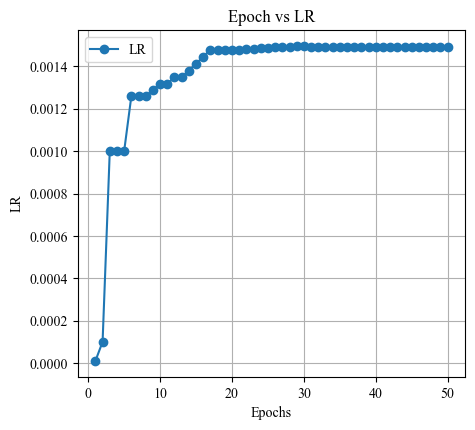

In [14]:
# Plot Train and Test Accuracy
plt.figure(figsize=(5, 4.5))
plt.plot(range(0, num_epochs + 1), learning_rate, label="LR", marker='o')
# plt.plot(range(1, num_epochs + 1), test_accuracies, label="Test Accuracy", marker='o', color="green")
plt.xlabel("Epochs")
plt.ylabel("LR")
plt.title("Epoch vs LR")
plt.legend()
plt.grid()
# Save the plot
# plt.savefig(f"{name}_Epoch_LR.png")
plt.show()
